<a href="https://colab.research.google.com/github/AnabelleSaindon/QLC240-S25/blob/main/exercise12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 9: Importing and initial visualization of data that we will be modeling

The following exercises will be organized into 4 sections:
    1. Comparing the 2 datasets (JMA, Argo) and looking at overlaps and gaps.
    2. Creating models to find the best fit model for the JMA dataset, to use on the ARGO data.
    3. Use only data from JMA that corresponds to the geographic area of the ARGO dataset. Then do the same thing as in section 2.
    4. Analysis of the best fit models from sections 2 and 3, to see if using data from the same geographic area results in a better model.

In [ ]:
#Import packages needed to run code
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Import the JMA dataset and visualize to see what we have.
IMport nitrate file as a pandas dataset.

In [ ]:
infile = 'jma_nitrate.csv'
#import infile as a panda dataframe and remove first column
data = pd.read_csv(infile, sep = (','))
data = data.drop(data.columns[0], axis=1)

#End the cell by visualizing the data variable, if that is what you called it, example:
data

,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16216,2.3991,34.4053,1204,42.96,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.334433
16217,2.2752,34.4674,1403,42.88,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.394058
16218,2.0916,34.5120,1602,42.20,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.444383
16219,1.9582,34.5527,1801,41.73,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.487322


Plotting a scater plot of nitrate and depth data from JMA cruise.
You might want to invert the axis, to make it look like an ocean water column.

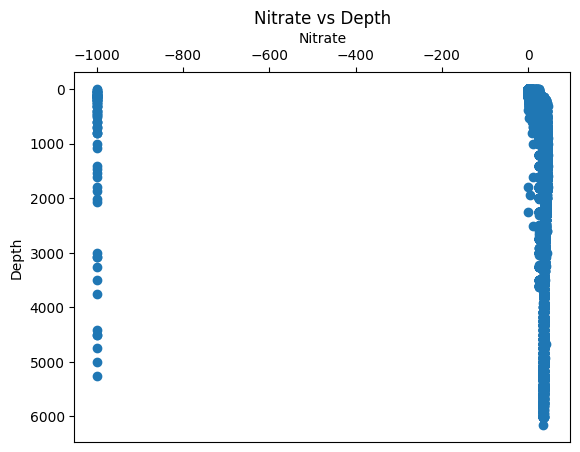

In [ ]:
#plot a scatter plot of nitrate and depth data from the data variable. Also, invert the y axis.
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(data['nitrate'], data['depth'])

# Invert the y-axis
plt.gca().invert_yaxis()
#put the x axis ticks and labels on top
plt.gca().xaxis.tick_top()

# Set the axis labels
#put nitrate label on top axis
plt.xlabel('Nitrate')
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Depth')

# Set the plot title
plt.title('Nitrate vs Depth')

# Display the plot
plt.show()

The raw jma data appear to have some nitrate values at -999, representing either no data or bad data. These have to be removed before we can continue.

In [ ]:
#Example:
# Looks like there are -999 values to indicate no samples or bad samples. Let's take those out.
corr_data = data[data.nitrate>0]
#Plot the corrected data in a scatter plot again.

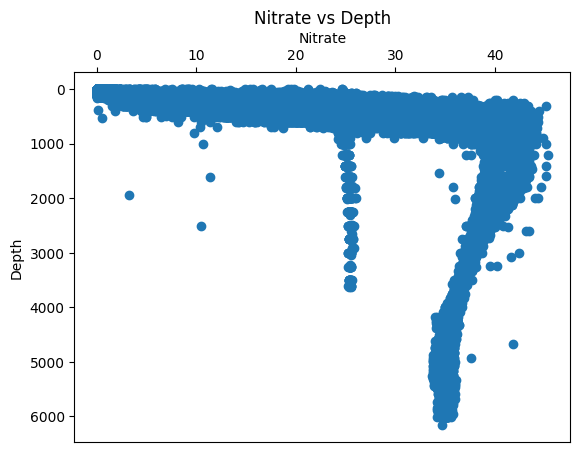

In [ ]:
#plot a scatter plot of nitrate and depth data from the data variable. Also, invert the y axis.
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(corr_data['nitrate'], corr_data['depth'])

# Invert the y-axis
plt.gca().invert_yaxis()
#put the x axis ticks and labels on top
plt.gca().xaxis.tick_top()

# Set the axis labels
#put nitrate label on top axis
plt.xlabel('Nitrate')
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Depth')

# Set the plot title
plt.title('Nitrate vs Depth')

# Display the plot
plt.show()

The following cell will read in another file, and fix some date/time variables so they are managable. You don't need to change it at all, except you need to upload the .csv file itself.

In [ ]:
# Reading in the Argo float data with no NO3 values
infile = 'kuro_BGCargo_noNO3.csv'
data_BGC = pd.read_csv(infile, sep = (','))

# Separating the date column of BGC argo data into year month and day columns to look at seasonality compared to the jma data.
import datetime

data_BGC['year'] = pd.DatetimeIndex(data_BGC['Date/GMT']).year
data_BGC['month'] = pd.DatetimeIndex(data_BGC['Date/GMT']).month
data_BGC['day'] = pd.DatetimeIndex(data_BGC['Date/GMT']).day
#data_BGC.head()

# Section 1, compare datasets (JMA, ARGO)

Compare the samples locations and see how the datasets overlap or don't overlap

In [ ]:
#Plot the corrected data and the Argo float data "Latitude" and "Longitude" coordinates. If you're unsure of the column to choose, just look at the data and the column head names.
#Scatter plot for example

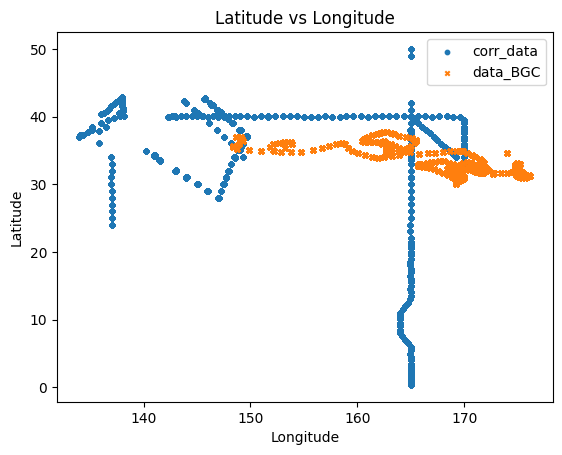

In [ ]:
#Plot the latitude and longitude coordinate from both the corr_data variable and the data_BGC variables as a scatter plot
import matplotlib.pyplot as plt

# Plot corr_data coordinates
plt.scatter(corr_data['lon'], corr_data['lat'], label='corr_data', marker='o', s=10)

# Plot data_BGC coordinates
plt.scatter(data_BGC['LON'], data_BGC['LAT'], label='data_BGC', marker='x', s=10)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude')

# Add legend
plt.legend()

# Display the plot
plt.show()

Just from the geographic extend, we can see that the distribution of JMA samples is considerably higher than that of BCG ARGO samples. However big this despair, for this and other variables, there is some overlap in the sampled region, depths, and seasons. The geographical extent overlaps in the region between the ~30 to ~40° of latitude and ~150 to ~175° of longitude.

Compare the water masses that were sampled in both datasets

In [ ]:
#Plot a scatter plot looking at the temperature vs depth profile, and seperate plot looking at salinity vs temperature. Each data source should be labeled differently.

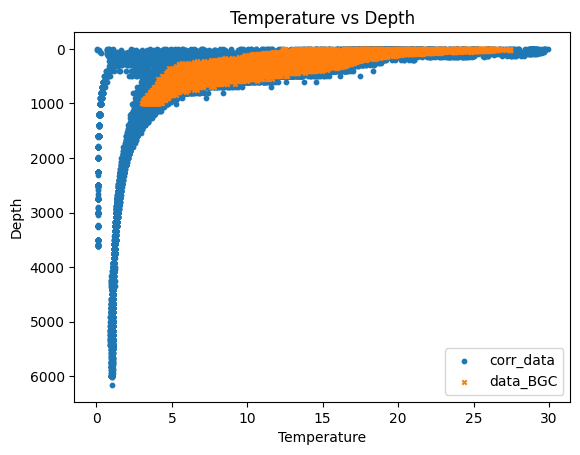

In [ ]:
#Plot corr_data temperature vs depth
plt.scatter(corr_data['theta'], corr_data['depth'], label='corr_data', marker='o', s=10)

# Plot data_BGC temperature vs depth
plt.scatter(data_BGC['TEMPERATURE[C]'], -1*data_BGC['DEPTH[M]'], label='data_BGC', marker='x', s=10)

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.title('Temperature vs Depth')

# Invert y-axis for depth
plt.gca().invert_yaxis()

# Add legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
#import the jma nitrate file, then get columns I want for training
infile = 'jma_nitrate.csv'
nitratefile = pd.read_csv(infile,sep=(','))
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
X = nitratefilefiltered[["sal","theta"]]
y = nitratefilefiltered[["nitrate"]]
print(np.shape(X))
print(np.shape(y))


#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=4)

(15574, 2)
(15574, 1)


In [ ]:
# generate the data
import matplotlib.pyplot as plt
import random


# pick model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

#run KNN with K neighbors ranging from 1-15, calculating
#r2 and RMSE to find the best fit model
results = []
for n in range(1,16,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    #print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    #print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    #print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    #print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)
results

[[1, 0.9999244588329586, 1.9577083745004555],
 [2, 0.9926641765325037, 2.1023442810947035],
 [3, 0.989514588375854, 2.10706049329573],
 [4, 0.9875921276098387, 2.0706835217173296],
 [5, 0.9865437661207203, 1.9822059857546313],
 [6, 0.9856772901755735, 2.0674938861315337],
 [7, 0.9850753685711865, 2.0231618147061234],
 [8, 0.984361676216424, 1.9938281621372436],
 [9, 0.9838926912854398, 1.9798149610477715],
 [10, 0.9834969126691031, 2.0006377484475992],
 [11, 0.9830582992053555, 1.9801517019642416],
 [12, 0.9828322163132741, 1.967323256718896],
 [13, 0.9825727782839158, 1.9608720966110749],
 [14, 0.982228313946171, 1.91842124679789],
 [15, 0.9818781183466356, 1.9262114926952743]]

In [ ]:
myarray = np.asarray(results)
myarray

array([[ 1.        ,  0.99992446,  1.95770837],
       [ 2.        ,  0.99266418,  2.10234428],
       [ 3.        ,  0.98951459,  2.10706049],
       [ 4.        ,  0.98759213,  2.07068352],
       [ 5.        ,  0.98654377,  1.98220599],
       [ 6.        ,  0.98567729,  2.06749389],
       [ 7.        ,  0.98507537,  2.02316181],
       [ 8.        ,  0.98436168,  1.99382816],
       [ 9.        ,  0.98389269,  1.97981496],
       [10.        ,  0.98349691,  2.00063775],
       [11.        ,  0.9830583 ,  1.9801517 ],
       [12.        ,  0.98283222,  1.96732326],
       [13.        ,  0.98257278,  1.9608721 ],
       [14.        ,  0.98222831,  1.91842125],
       [15.        ,  0.98187812,  1.92621149]])

In [ ]:
#Make list into array to plot nicely, in order to look at all of the
#results

myarray = np.asarray(results)

#make a dataframe with each column named for ploting
data = pd.DataFrame({'Kneighbors': myarray[:,0], 'AccScore': myarray[:,1], 'RMSE': myarray[:,2]})
data

,Kneighbors,AccScore,RMSE
0,1.0,0.999924,1.957708
1,2.0,0.992664,2.102344
2,3.0,0.989515,2.107060
3,4.0,0.987592,2.070684
4,5.0,0.986544,1.982206
5,6.0,0.985677,2.067494
6,7.0,0.985075,2.023162
7,8.0,0.984362,1.993828
8,9.0,0.983893,1.979815
9,10.0,0.983497,2.000638


In [ ]:
#Run best fit model, and display results
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train, y_train)
print ('Neighbors = %s\n' % (13))
    # compute the R^2 score
accuracyscore = model.score(X_train,y_train)
print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
rmse = sqrt(mean_squared_error(y_test, yfit))
print("RMSE = %s \n" % (rmse))

Neighbors = 13

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 1.9608720966110749 



The next two plots show the predicted nitrate vs salinity (and then temperature). Both training and test datasets are plotted. We can see here that the predicted variables do align with the general test data sets and their aren't many outliers. Meaning there doesn't seem to be overtraining on any specific data points.



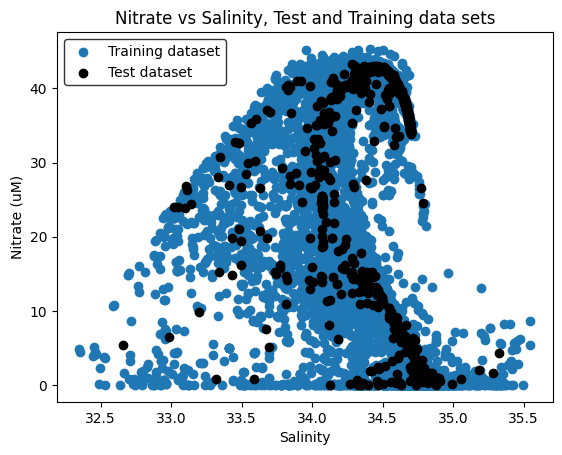

In [ ]:
#Plot salinity vs. nitrate predicted
plt.scatter(X_train[["sal"]],y_train)
plt.scatter(xfit[["sal"]], yfit,c = 'k')
plt.xlabel('Salinity')
plt.ylabel('Nitrate (uM)')
plt.title('Nitrate vs Salinity, Test and Training data sets')
plt.legend(('Training dataset', 'Test dataset'), edgecolor = 'k')

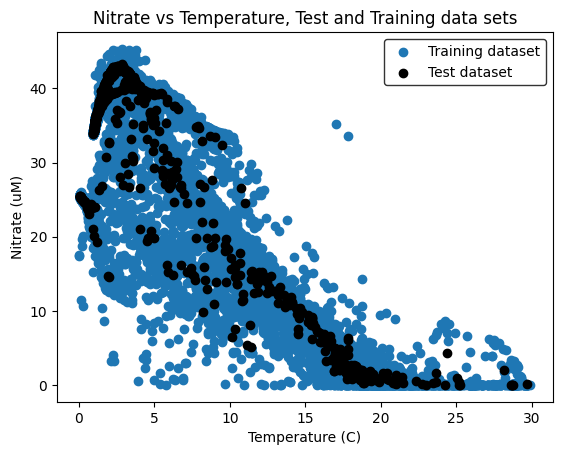

In [ ]:
#Plot temperature vs. nitrate predicted
plt.scatter(X_train[["theta"]],y_train)
plt.scatter(xfit[["theta"]], yfit,c = 'k')
plt.xlabel('Temperature (C)')
plt.ylabel('Nitrate (uM)')
plt.title('Nitrate vs Temperature, Test and Training data sets')
plt.legend(('Training dataset', 'Test dataset'), edgecolor = 'k')

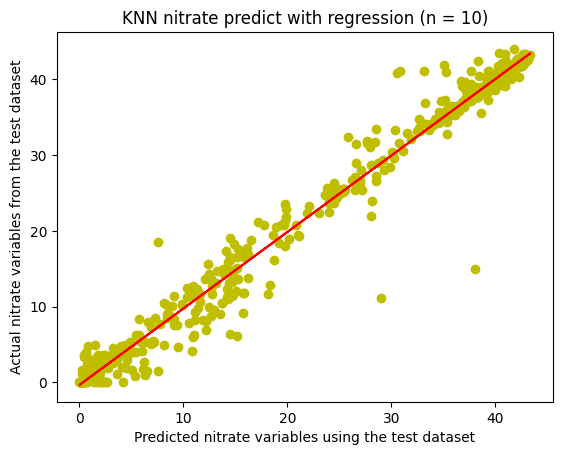

r2 = 0.9998735284364396 

RMSE = 0.16753619421970087 



In [ ]:
#Plot predicted nitrate from test compared to actual nitrate from test
#this is using the best fit model decided above
from sklearn.linear_model import LinearRegression
plt.scatter(yfit,y_test,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(yfit, y_test)  # perform linear regression
Y_pred = linear_regressor.predict(yfit)  # make predictions
plt.plot(yfit, Y_pred, color='red')
plt.xlabel("Predicted nitrate variables using the test dataset")
plt.ylabel("Actual nitrate variables from the test dataset")
plt.title("KNN nitrate predict with regression (n = 10)")
plt.show()
r2 = r2_score(yfit, Y_pred)
print("r2 = %s \n" % (r2))
rmse = sqrt(mean_squared_error(yfit, Y_pred))
print("RMSE = %s \n" % (rmse))
#The plot and r2/RMSE values above show that the predicted nitrate values for the test dataset compare well to the actual nitrate values. There are some outliers seen on the graph but the statistics show that the model is a great fit overall on the test dataset.

In [ ]:
#File using all of data for training
#nitratefile

infilekuro = 'kuro_BGCargo_noNO3.csv'
nitratefilekuro = pd.read_csv(infilekuro,sep=(','))
X = nitratefilekuro[["SALINITY[PSS]","TEMPERATURE[C]"]]

infilekurowithnitrate = 'kuro_BGCargo_NO3.csv'
realNO3file = pd.read_csv(infilekurowithnitrate,sep=(','))
NO3real = realNO3file[["NITRATE[uMOL/KG]"]]

Here we are filtering the argo data, so that we don't try and predict values that are below 0. From the argo dataset, we get rid of any nitrate values (and associated temp/salinity values) that are less than 0. Such that our model doesn't try and predict nitrate values that are less than 0.

In [ ]:
#Add salinity, temperature, nitrate columns together. Then filter all three based on nitrate>0

Xconcat = pd.concat([X, NO3real], axis=1)
#print Xconcat.shape
NO3filter =  Xconcat['NITRATE[uMOL/KG]']>=0
#print(NO3filter.head())
AllNo3filtered = Xconcat[NO3filter]
X = AllNo3filtered[["SALINITY[PSS]","TEMPERATURE[C]"]]
# Rename the column SALINITY[PSS] to sal
X.rename(columns={'SALINITY[PSS]': 'sal'}, inplace=True)
# Rename the column TEMPERATURE[C] to theta
X.rename(columns={'TEMPERATURE[C]': 'theta'}, inplace=True)
#print X.shape
NO3real = AllNo3filtered[["NITRATE[uMOL/KG]"]]
#print AllNo3filtered.shape
#NO3filter

<ipython-input-45-2b30b7676f12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'SALINITY[PSS]': 'sal'}, inplace=True)
<ipython-input-45-2b30b7676f12>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'TEMPERATURE[C]': 'theta'}, inplace=True)


In [ ]:
#Run best fit model, and display results
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
print ('Neighbors = %s\n' % (10))
    # compute the R^2 score
accuracyscore = model.score(X_train,y_train)
print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
rmse = sqrt(mean_squared_error(y_test, yfit))
print("RMSE = %s \n" % (rmse))

Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.0006377484475992 



In [ ]:
#Predict the argo nitrate data using filtered Salinity/Temperature data from the argo dataset
NO3predicted = model.predict(X)
NO3predicted

array([[42.056],
       [41.432],
       [41.396],
       ...,
       [40.252],
       [39.404],
       [38.218]])

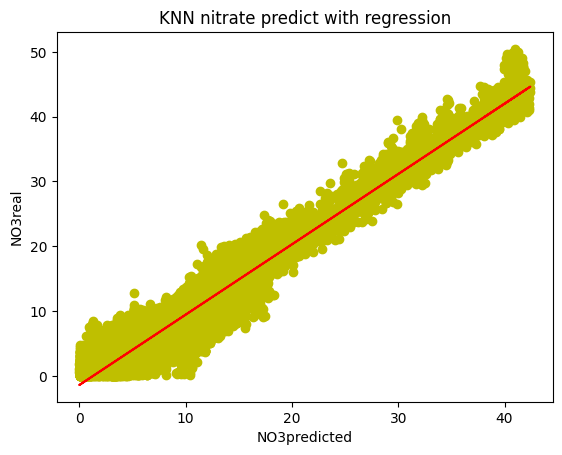

r2 = 0.9536996794565983 

RMSE = 2.5676278933946706 



In [ ]:
#NO3realfilter = NO3real[NO3real.NITRATE[uMOL/KG]>0]
ax = plt.scatter(NO3predicted,NO3real,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(NO3predicted, NO3real)  # perform linear regression
Y_pred = linear_regressor.predict(NO3predicted)  # make predictions
plt.plot(NO3predicted, Y_pred, color='red')
plt.xlabel("NO3predicted")
plt.ylabel("NO3real")
plt.title("KNN nitrate predict with regression")
plt.show()
r2 = r2_score(NO3predicted, NO3real)
print("r2 = %s \n" % (r2))
#text(50, 5, r2, fontsize=12)
rmse = sqrt(mean_squared_error(NO3predicted, NO3real))
print("RMSE = %s \n" % (rmse))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range(7,10,1):
    for layers in range(7,10,1):
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved,max_iter=500,random_state=4)
        mlp.fit(X_train,y_train)
        trainres = mlp.score(X_train,y_train)
        predictions = mlp.predict(X_test)
        accresults = mlp.score(X_test,y_test)
        res = [nodes,layers,trainres,accresults]
        results.append(res)
    layers_saved=[]
print(results)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed w

[[7, 7, 0.9169883031107631, 0.9230956055321682], [7, 8, 0.9171039807438549, 0.923797205534508], [7, 9, 0.9187799958291415, 0.9249658128047722], [8, 7, 0.8725647830305513, 0.8797237612996782], [8, 8, 0.9201853831995938, 0.9266952541606476], [8, 9, 0.9199850598966066, 0.9265819798531479], [9, 7, 0.9144562580667973, 0.9191413066393052], [9, 8, 0.9154770899486193, 0.9209161393130298], [9, 9, 0.9229798635080163, 0.9296126764204231]]


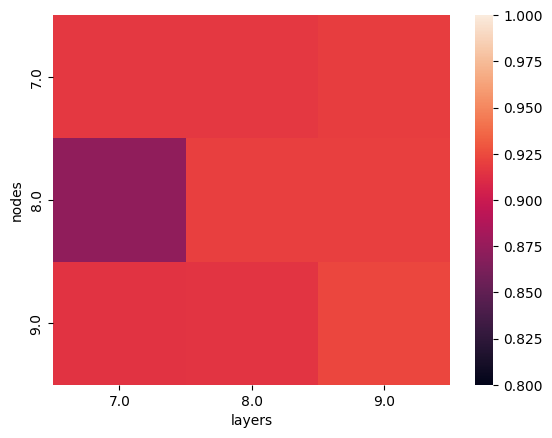

In [ ]:
import seaborn as sns
myarray = np.asarray(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,2]})
data_pivoted = data.pivot(index="nodes", columns="layers", values="Z")
ax = sns.heatmap(data_pivoted,vmin=0.8, vmax=1)
plt.show()

In [ ]:
# Create mlpregrssor model with 8 nodes and 8 layers
mlp = MLPRegressor(hidden_layer_sizes=(8,8),max_iter=500,random_state=4)
mlp.fit(X_train,y_train)
trainres = mlp.score(X_train,y_train)
predictions = mlp.predict(X_test)
accresults = mlp.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predictions

array([41.31341884, 28.99142871, 28.12014039, 20.92216135, 39.96545202,
        5.63712731, 24.49964578, 39.84966177, 26.00728098, 41.05077769,
       34.68826659,  6.72849932, 37.42284441,  9.72935311,  6.2317752 ,
       13.48342055, 37.4551345 , 40.89426317, 30.56308749, 40.50012905,
       36.6492235 , 39.9431512 ,  2.02262176, 40.23555255, 36.78442533,
       34.84288733, 41.22014363,  2.09084355,  3.37408064, 25.04637596,
        1.96810801, 41.0982522 ,  7.80734434,  2.95470122, 38.88894806,
       34.91996795, 38.36932507, 40.25737536,  1.37006444, 37.14692116,
       33.49602783,  1.50586861,  2.91663327, 38.46455322, 38.31510872,
       39.6159446 , 37.37386848, 16.70432519, 41.12668391, 33.40851007,
        4.33230778, 41.51150937,  6.18278108, 39.06740413, 22.91013783,
       41.59627683, 14.892419  , 20.76368642,  1.76753489, 41.08193562,
       40.51608693, 40.71892311, 37.57552033, 35.62203814, 34.85608691,
       14.87674966, 36.49477642,  4.74780201, 10.54953172, 38.66

In [ ]:
accresults

0.9266952541606476

In [ ]:
#Predict the y values from X using the mlp model above
NO3predicted = mlp.predict(X)
#Reshape so that it NO3predicted is 1d array
NO3predicted = NO3predicted.reshape(-1,1)
NO3predicted

array([[41.13699722],
       [41.09868931],
       [40.84385088],
       ...,
       [38.5694387 ],
       [37.64436204],
       [36.46203954]])

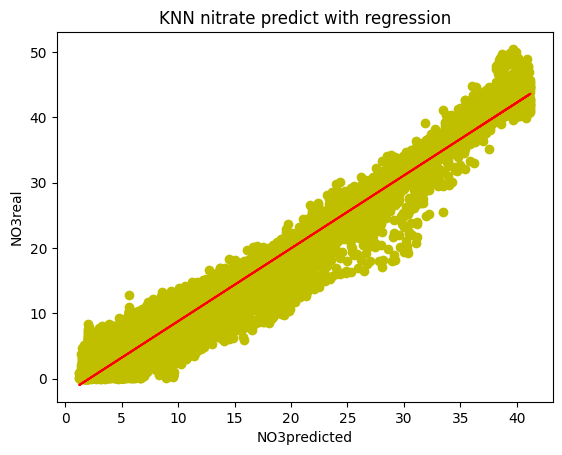

r2 = 0.9373485251830852 

RMSE = 2.903124915650842 



In [ ]:
#NO3realfilter = NO3real[NO3real.NITRATE[uMOL/KG]>0]
ax = plt.scatter(NO3predicted,NO3real,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(NO3predicted, NO3real)  # perform linear regression
Y_pred = linear_regressor.predict(NO3predicted)  # make predictions
plt.plot(NO3predicted, Y_pred, color='red')
plt.xlabel("NO3predicted")
plt.ylabel("NO3real")
plt.title("KNN nitrate predict with regression")
plt.show()
r2 = r2_score(NO3predicted, NO3real)
print("r2 = %s \n" % (r2))
#text(50, 5, r2, fontsize=12)
rmse = sqrt(mean_squared_error(NO3predicted, NO3real))
print("RMSE = %s \n" % (rmse))

In the physical therapy field, we could model the time for recovery for an ACL injury based on history of prior injury. The X variable would be the previous knee injury history and the Y variable is the recovery time in weeks.